In [1]:
import seaborn as sn
import pandas as pd 
import cufflinks as cf

In [2]:
df=pd.read_csv('adv.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


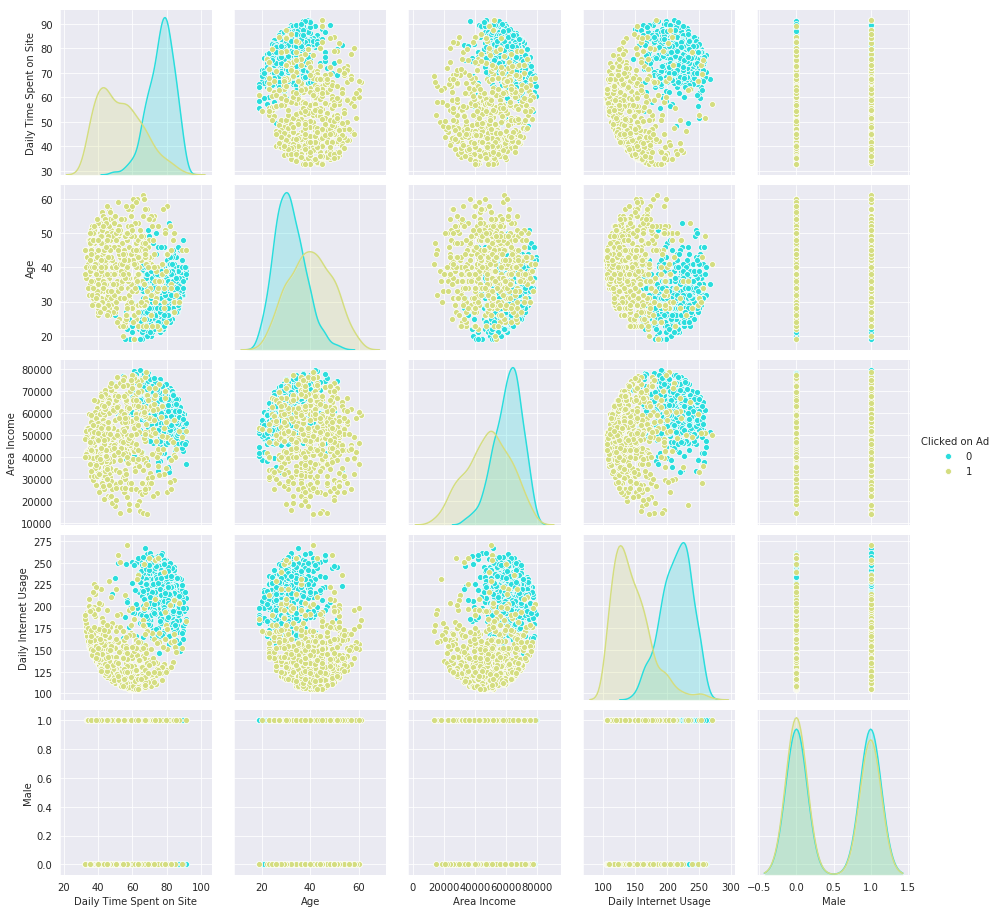

In [8]:
sn.set_palette(palette='cubehelix', n_colors=8, desat=True)
sn.set_style('darkgrid')
sn.pairplot(df, hue='Clicked on Ad',palette='rainbow')

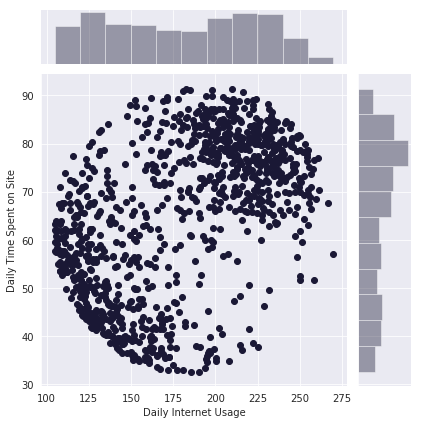

In [9]:
sn.jointplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site')

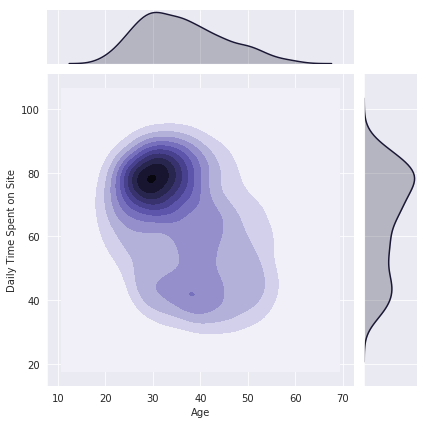

In [10]:
sn.jointplot(data=df, x='Age', y='Daily Time Spent on Site', kind='kde')

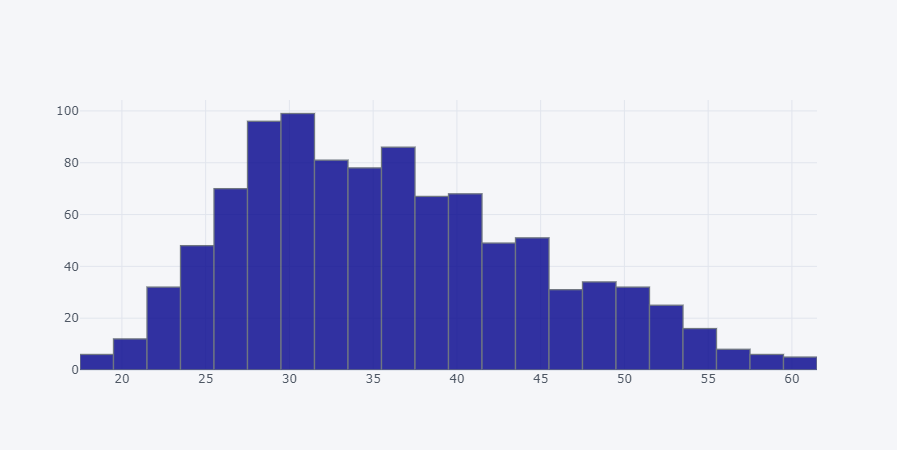

In [71]:
df['Age'].iplot(kind='hist',bins=30, colors='Darkblue')

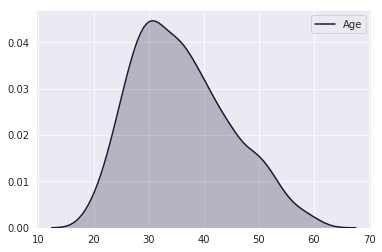

In [11]:
sn.kdeplot(data=df['Age'], bw='scott', shade=True)

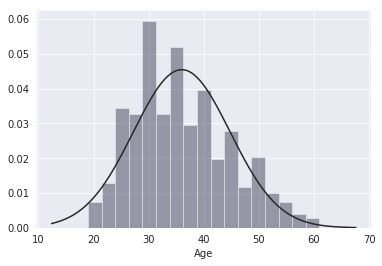

In [12]:
from scipy import stats
sn.distplot(df['Age'], fit=stats.norm, kde=False)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

import datetime
st=df['Daily Time Spent on Site']
at=pd.to_datetime(st)

atd={'Daily Time Spent on Site':at}
atpd=pd.DataFrame(atd)
atpd.head()

df=pd.concat([df,atpd],axis=1)
df.head(2)
df.info()

In [16]:
x=df[[ 'Daily Time Spent on Site','Age', 'Area Income','Daily Internet Usage', 'Male']]
y=df['Clicked on Ad']

In [17]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.40, random_state=101)

In [18]:
from sklearn.linear_model import LogisticRegression 

In [19]:
md=LogisticRegression()

In [20]:
md.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
perdictions=md.predict(X_test)

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix ,plot_precision_recall_curve, plot_roc_curve

In [23]:
print(classification_report(y_test,perdictions))
print(confusion_matrix(y_test,perdictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       206
           1       0.92      0.88      0.90       194

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400

[[192  14]
 [ 23 171]]


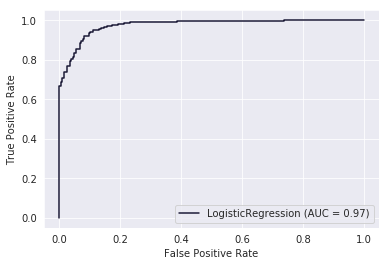

In [24]:
import matplotlib.pyplot as plt
plot_roc_curve(md,X_test,y_test)

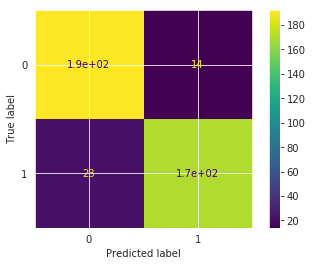

In [25]:
plot_confusion_matrix(md,X_test,y_test)



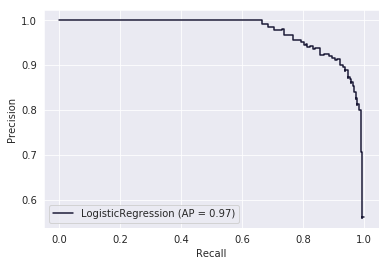

In [26]:
plot_precision_recall_curve(md,X_test,y_test)

In [27]:
import pickle

In [34]:
with open ('model1_pickle','wb') as modlefile:
    pickle.dump(md,modlefile)

In [35]:
with open ('model1_pickle','rb') as modlefile:
    im=pickle.load(modlefile)

In [38]:
prediction=im.predict(X_test)

In [39]:
from sklearn.metrics import plot_confusion_matrix ,plot_precision_recall_curve, plot_roc_curve

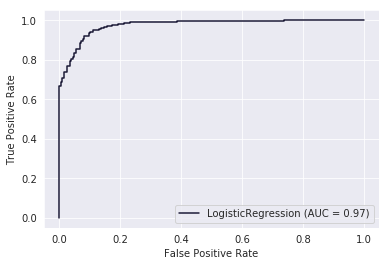

In [41]:
plot_roc_curve(im,X_test,y_test)